<a href="https://colab.research.google.com/github/Radhika02005/CreditCardDS/blob/main/Credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('/content/creditcard.csv')

In [4]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset contains 9965 rows and 31 columns.


In [6]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


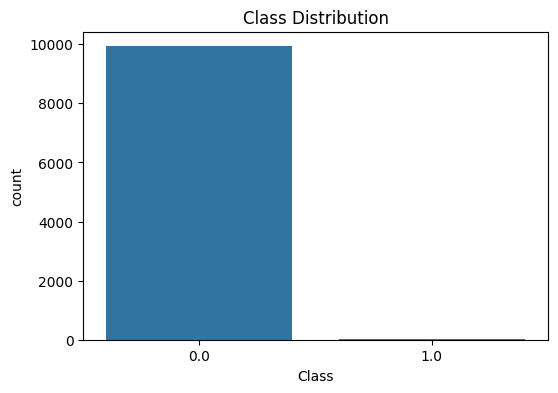

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title("Class Distribution")
plt.show()

In [8]:
print(data['Class'].value_counts(normalize=True))

Class
0.0    0.996186
1.0    0.003814
Name: proportion, dtype: float64


In [9]:
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

In [10]:
data = data.drop(columns=['Time'])

In [11]:
data = data.dropna(subset=['Class'])

In [12]:
X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
smote = SMOTE(sampling_strategy=0.5, random_state=42, k_neighbors=2) # Changed k_neighbors to 2
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [14]:
print(y_train_resampled.value_counts(normalize=True))

Class
0.0    0.666695
1.0    0.333305
Name: proportion, dtype: float64


In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [16]:
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)

In [18]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1985
         1.0       1.00      0.75      0.86         8

    accuracy                           1.00      1993
   macro avg       1.00      0.88      0.93      1993
weighted avg       1.00      1.00      1.00      1993



In [19]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1985    0]
 [   2    6]]


In [20]:
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

ROC-AUC Score: 0.875


In [21]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [22]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1)

In [23]:
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [24]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [25]:
best_model = grid_search.best_estimator_

In [33]:
data['Transaction_Frequency'] = data.groupby('Class')['Amount'].transform('count')

In [36]:
import numpy as np # Import the numpy library with the alias 'np'

data['Spending_Pattern'] = np.where(data['Amount'] > data['Amount'].quantile(0.99), 1, 0)

In [38]:
data['Location_Mismatch'] = np.random.choice([0, 1], size=len(data), p=[0.95, 0.05])

In [40]:
print(data.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V24       V25       V26       V27  \
0  0.098698  0.363787  0.090794  ...  0.066928  0.128539 -0.189115  0.133558   
1  0.085102 -0.255425 -0.166974  ... -0.339846  0.167170  0.125895 -0.008983   
2  0.247676 -1.514654  0.207643  ... -0.689281 -0.327642 -0.139097 -0.055353   
3  0.377436 -1.387024 -0.054952  ... -1.175575  0.647376 -0.221929  0.062723   
4 -0.270533  0.817739  0.753074  ...  0.141267 -0.206010  0.502292  0.219422   

        V28    Amount  Class  Transaction_Frequency  Spending_Patter

In [41]:
import joblib

In [42]:
joblib.dump(model, "fraud_detection_model.pkl")

['fraud_detection_model.pkl']

In [43]:
loaded_model = joblib.load("fraud_detection_model.pkl")